# 第五回：样式色彩秀芳华

## 一、matplotlib的绘图样式（style）

在matplotlib中，要想设置绘制样式，最简单的方法是在绘制元素时单独设置样式。
但是有时候，当用户在做专题报告时，往往会希望保持整体风格的统一而不用对每张图一张张修改，因此matplotlib库还提供了四种批量修改全局样式的方式

### 1.matplotlib预先定义样式

matplotlib贴心地提供了许多内置的样式供用户使用，使用方法很简单，只需在python脚本的最开始输入想使用style的名称即可调用，尝试调用不同内置样式，比较区别

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

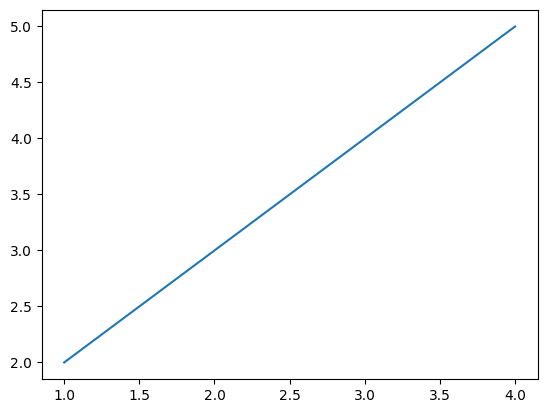

In [15]:
plt.style.use('default')
plt.plot([1,2,3,4],[2,3,4,5])

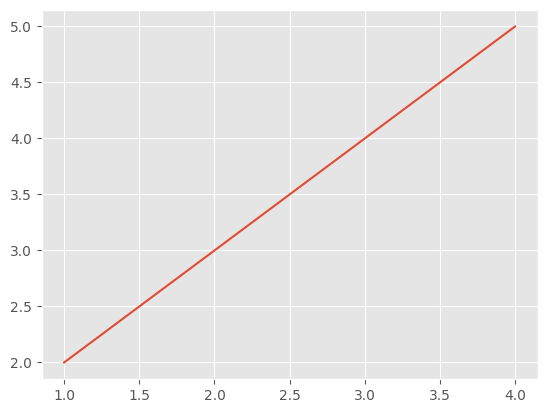

In [16]:
plt.style.use('ggplot')
plt.plot([1,2,3,4],[2,3,4,5])

那么matplotlib究竟内置了那些样式供使用呢？总共以下26种丰富的样式可供选择。

In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 2.用户自定义stylesheet

在任意路径下创建一个后缀名为mplstyle的样式清单，编辑文件添加以下样式内容  

> axes.titlesize : 24     
axes.labelsize : 20   
lines.linewidth : 3   
lines.markersize : 10   
xtick.labelsize : 16   
ytick.labelsize : 16  

引用自定义stylesheet后观察图表变化。

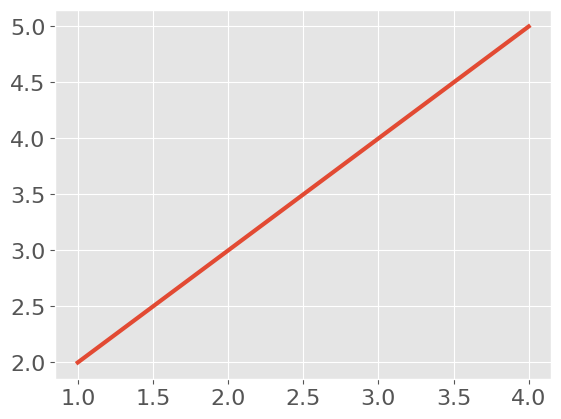

In [18]:
plt.style.use('file/presentation.mplstyle')
plt.plot([1,2,3,4],[2,3,4,5])

值得特别注意的是，matplotlib支持混合样式的引用，只需在引用时输入一个样式列表，若是几个样式中涉及到同一个参数，右边的样式表会覆盖左边的值。

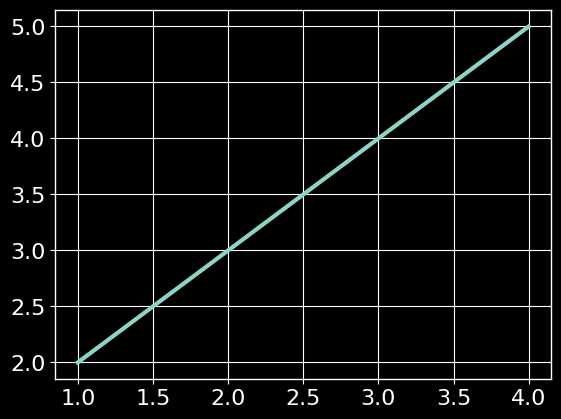

In [19]:
plt.style.use(['dark_background', 'file/presentation.mplstyle'])
plt.plot([1,2,3,4],[2,3,4,5])

### 3.设置rcparams

我们还可以通过修改默认rc设置的方式改变样式，所有rc设置都保存在一个叫做 matplotlib.rcParams的变量中。  
修改过后再绘图，可以看到绘图样式发生了变化。

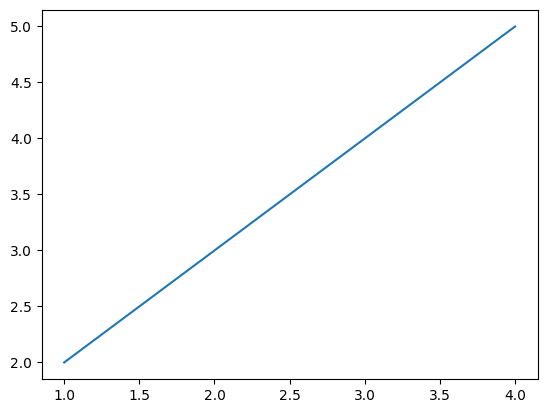

In [20]:
plt.style.use('default') # 恢复到默认样式
plt.plot([1,2,3,4],[2,3,4,5])

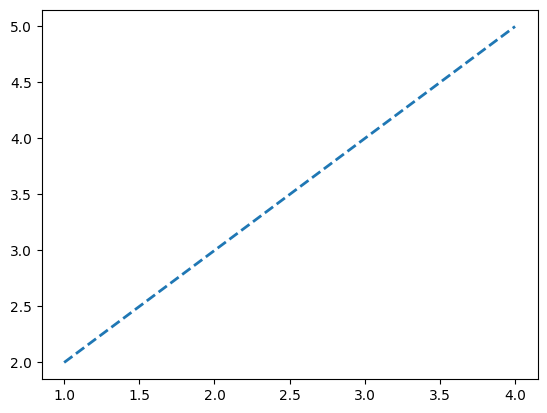

In [21]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1,2,3,4],[2,3,4,5])

另外matplotlib也还提供了了一种更便捷的修改样式方式，可以一次性修改多个样式。

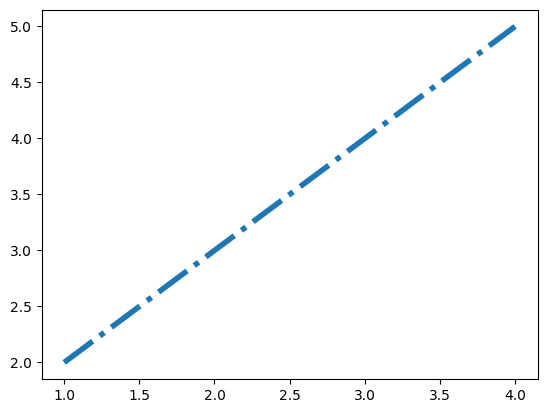

In [22]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot([1,2,3,4],[2,3,4,5])

### 4.修改matplotlibrc文件

由于matplotlib是使用matplotlibrc文件来控制样式的，也就是上一节提到的rc setting，所以我们还可以通过修改matplotlibrc文件的方式改变样式。

In [3]:
# 查找matplotlibrc文件的路径
mpl.matplotlib_fname()

'd:\\program files\\anaconda3\\envs\\matplot\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

找到路径后，就可以直接编辑样式文件了，打开后看到的文件格式大致是这样的，文件中列举了所有的样式参数，找到想要修改的参数，比如lines.linewidth: 8，并将前面的注释符号去掉，此时再绘图发现样式以及生效了。

![](https://img-blog.csdnimg.cn/20201124005855980.PNG)

## 二、matplotlib的色彩设置（color）

在可视化中，如何选择合适的颜色和搭配组合也是需要仔细考虑的，色彩选择要能够反映出可视化图像的主旨。  
从可视化编码的角度对颜色进行分析，可以将颜色分为`色相、亮度和饱和度`三个视觉通道。通常来说：  
`色相`： 没有明显的顺序性、一般不用来表达数据量的高低，而是用来表达数据列的类别。  
`明度和饱和度`： 在视觉上很容易区分出优先级的高低、被用作表达顺序或者表达数据量视觉通道。  
具体关于色彩理论部分的知识，不属于本教程的重点，请参阅有关拓展材料学习。  
[ECharts数据可视化实验室](https://vis.baidu.com/chartcolor/basis/)  
[学会这6个可视化配色基本技巧，还原数据本身的意义](https://zhuanlan.zhihu.com/p/88892542)

在matplotlib中，设置颜色有以下几种方式：

### 1.RGB或RGBA

In [24]:
plt.style.use('default')

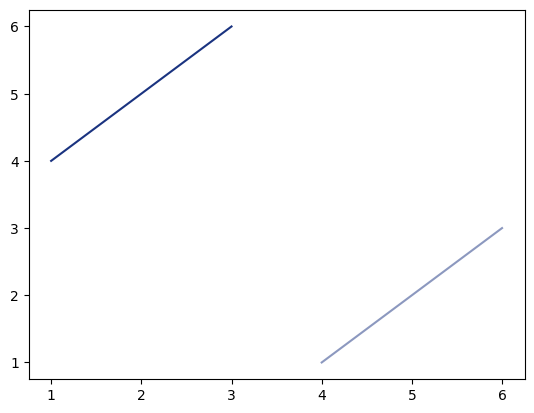

In [25]:
# 颜色用[0,1]之间的浮点数表示，四个分量按顺序分别为(red, green, blue, alpha)，其中alpha透明度可省略
plt.plot([1,2,3],[4,5,6],color=(0.1, 0.2, 0.5))
plt.plot([4,5,6],[1,2,3],color=(0.1, 0.2, 0.5, 0.5))

### 2.HEX RGB 或 RGBA 

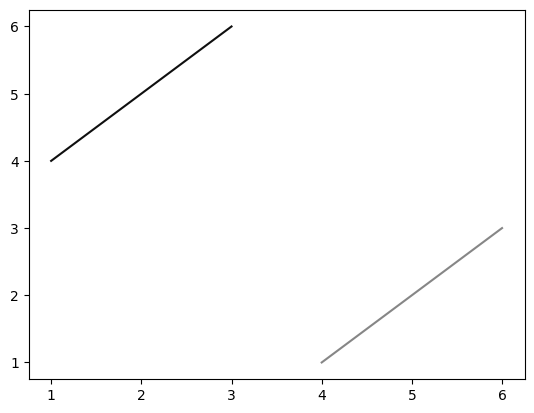

In [26]:
# 用十六进制颜色码表示，同样最后两位表示透明度，可省略
plt.plot([1,2,3],[4,5,6],color='#0f0f0f')
plt.plot([4,5,6],[1,2,3],color='#0f0f0f80')

### 3.灰度色阶

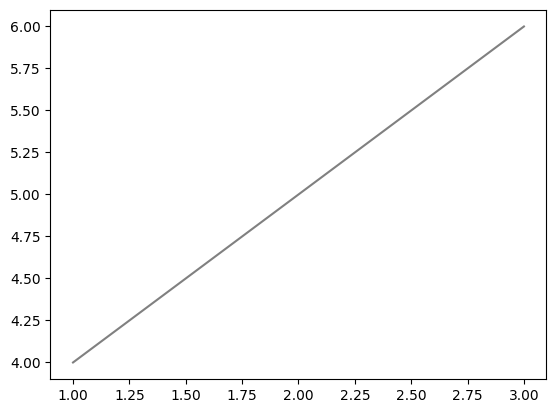

In [27]:
# 当只有一个位于[0,1]的值时，表示灰度色阶
plt.plot([1,2,3],[4,5,6],color='0.5')

### 4.单字符基本颜色

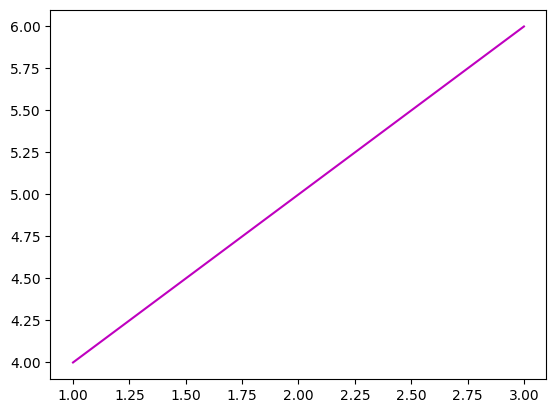

In [28]:
# matplotlib有八个基本颜色，可以用单字符串来表示，分别是'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'，对应的是blue, green, red, cyan, magenta, yellow, black, and white的英文缩写
plt.plot([1,2,3],[4,5,6],color='m')

### 5.颜色名称

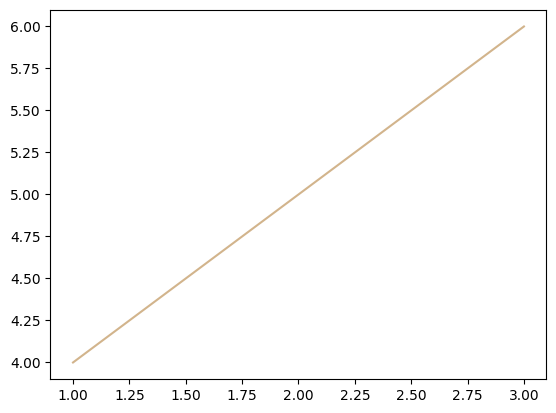

In [29]:
# matplotlib提供了颜色对照表，可供查询颜色对应的名称
plt.plot([1,2,3],[4,5,6],color='tan')

![](https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_002.png)
![](https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png)

### 6.使用colormap设置一组颜色

有些图表支持使用colormap的方式配置一组颜色，从而在可视化中通过色彩的变化表达更多信息。

在matplotlib中，colormap共有五种类型:

- 顺序（Sequential）。通常使用单一色调，逐渐改变亮度和颜色渐渐增加，用于表示有顺序的信息
- 发散（Diverging）。改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇；当绘制的信息具有关键中间值（例如地形）或数据偏离零时，应使用此值。
- 循环（Cyclic）。改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇。用于在端点处环绕的值，例如相角，风向或一天中的时间。
- 定性（Qualitative）。常是杂色，用来表示没有排序或关系的信息。
- 杂色（Miscellaneous）。一些在特定场景使用的杂色组合，如彩虹，海洋，地形等。

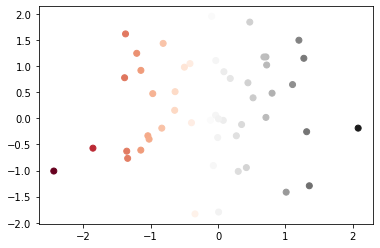

In [4]:
x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x,y,c=x,cmap='RdGy')

## 作业


1）查阅matplotlib官网，列举出Sequential，Diverging，Cyclic，Qualitative，Miscellaneous分别有哪些内置的colormap，并以`代码绘图`的形式展现出来

2）学习如何自定义colormap，并将其应用到任意一个数据集中，绘制一幅图像，注意colormap的类型要和数据集的特性相匹配，并做简单解释

颜色图的类别
颜色图通常根据其功能分为几类（例如，参见 [Moreland]）：

顺序的：亮度变化，通常使用单个色调，逐渐增加色彩饱和度；应该用于表示已排序的信息。
发散：亮度的变化以及两种不同颜色的饱和度可能在中间以不饱和颜色相遇；当要绘制的信息具有临界中间值（例如地形）或数据偏离零附近时，应使用。
周期性：两种颜色的亮度变化，在中间和开始/结束时会以不饱和颜色相遇；应使用在端点处回绕的值，例如相角，风向或一天中的时间。
定性的：通常是杂色；应该用来表示没有顺序或关系的信息。

In [2]:
# sphinx_gallery_thumbnail_number = 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

顺序
对于顺序图，亮度值通过色图单调增加。很好 某些L∗ 颜色图中的值范围从0到100（二进制和另一个灰度），其他值从 L∗=20。那些范围较小的L∗因此将具有较小的感知范围。另请注意L∗ 功能在颜色图之间有所不同：有些在 L∗ 其他人则比较弯曲。

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

Sequential2 
许多 L∗ Sequential2图的值单调增加，但在某些（秋季，凉爽，春季和冬季）平稳期甚至在 L∗空间。其他（鼓风，铜，热和热）在L∗职能。在颜色图处于平稳或扭结区域的区域中表示的数据将导致感觉到数据在颜色图中的那些值中出现条带（有关此示例，请参见[mycarta-banding]）。

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

发散
对于发散地图，我们希望单调递增 L∗ 最大值，应该接近 L∗=100，然后单调递减 L∗价值观。我们正在寻找近似相等的最小值L∗色彩图相对两端的值。通过这些措施，BrBG和RdBu是不错的选择。coolwarm是一个不错的选择，但它涵盖的范围并不广泛L∗ 值（请参见下面的灰度部分）。

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

循环
对于循环贴图，我们希望以相同的颜色开始和结束，并在中间遇到一个对称的中心点。 L∗从开始到中间应该单调变化，而从中间到结束则相反。它在增加和减少方面应该是对称的，并且只有色相不同。在两端和中间，L∗ 将反转方向，应将其平滑 L∗减少伪影的空间。有关循环图设计的更多信息，请参见[kovesi-colormaps]。

尽管此HSV颜色图与中心点不对称，但它仍包含在这组颜色图中。此外，L∗整个颜色表中的值变化很大，使其成为表示数据以供观看者感知的不好选择。在[mycarta-jet]上可以看到关于这个想法的扩展 。

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

定性
定性色图的目的不是感知图，但是查看亮度参数可以为我们证明这一点。的L∗值在整个颜色表中各处移动，并且显然不会单调增加。这些不是用作感知色图的好选择。

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

杂项
一些其他颜色图具有特定的用途（已针对它们创建）。例如，gist_earth，海洋和地形似乎都是为了将​​地形（绿色/棕色）和水深（蓝色）一起绘制而创建的。然后，我们希望看到这些颜色贴图存在差异，但是多种扭曲可能并不理想，例如在gist_earth和terrain中。创建CMRmap可以很好地将其转换为灰度，尽管它似乎确实存在一些小缺陷 L∗。立方螺旋的创建是为了使亮度和色调都平滑变化，但是在绿色色调区域似乎出现了一个小的驼峰。

这组颜色图中包含了常用的喷射颜色图。我们可以看到L∗整个颜色表中的值变化很大，使其成为表示数据以供观看者感知的不好选择。在[mycarta-jet]上可以看到关于这个想法的扩展。

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

首先，我们将显示每个颜色图的范围。请注意，有些更改似乎比其他更改更“迅速”。

In [5]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

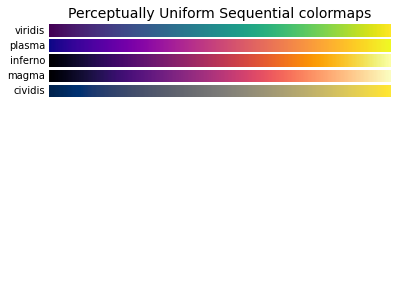

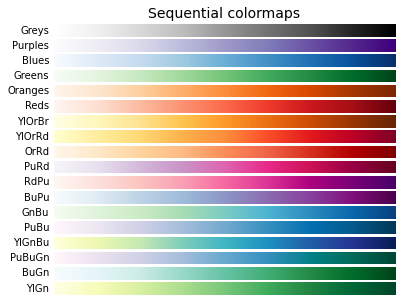

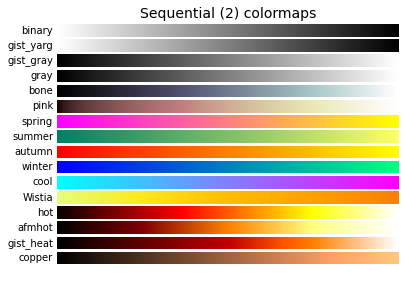

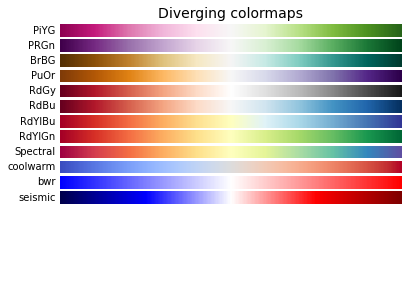

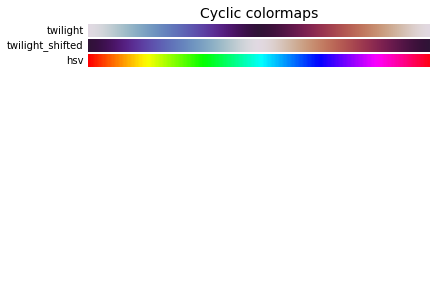

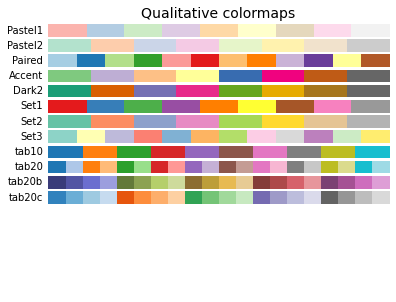

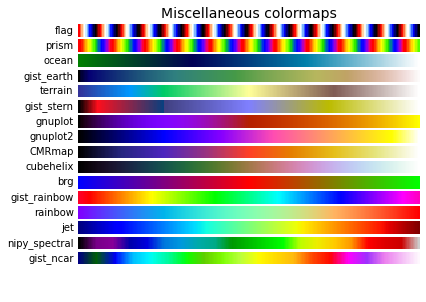

In [6]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

### 本文参考

[colormap参考](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)